In [8]:
import pandas as pd
import numpy as np

In [31]:
with open("resultsEN.txt") as f:
    results_en = pd.read_csv(f, sep='\t', skiprows=(0), header=(0))
    
with open("resultsCZ.txt") as f:
    results_cz = pd.read_csv(f, sep='\t', skiprows=(0), header=(0))

In [261]:
with open("entropy_resultsEN.txt") as f:
    en_results = pd.read_csv(f, sep='\t', skiprows=(0),header=(0))
with open("entropy_resultsCZ.txt") as f:
    cz_results = pd.read_csv(f, sep='\t', skiprows=(0),header=(0))

In [262]:
cz_results.groupby('TEXT',sort=False).agg('ENTROPY').mean()

TEXT
original       4.747810
char_0.1       4.005898
char_0.05      4.335581
char_0.01      4.657898
char_0.001     4.738564
char_0.0001    4.746787
char_1e-05     4.747724
word_0.1       4.636670
word_0.05      4.697656
word_0.01      4.738852
word_0.001     4.747004
word_0.0001    4.747712
word_1e-05     4.747811
Name: ENTROPY, dtype: float64

In [72]:
char_en = results_en[0:61]
word_en = pd.concat([results_en[0:1],results_en[61:]])

In [74]:
char_cz = results_cz[0:61]
word_cz = pd.concat([results_cz[0:1],results_cz[61:]])

In [175]:
mean_char_en = char_en.groupby(['TEXT'], sort=False).agg('ENTROPY').mean()
mean_char_cz = char_cz.groupby(['TEXT'], sort=False).agg('ENTROPY').mean()
mean_word_en = word_en.groupby(['TEXT'], sort=False).agg('ENTROPY').mean()
mean_word_cz = word_cz.groupby(['TEXT'], sort=False).agg('ENTROPY').mean()

[5.28744566288275, 4.730817748411123, 5.056425654403753, 5.250408022380423, 5.283493315473844, 5.287080908552151, 5.287432362370248] [Index(['original', 'char_0.1', 'char_0.05', 'char_0.01', 'char_0.001',
       'char_0.0001', 'char_0.00001'],
      dtype='object', name='TEXT')]


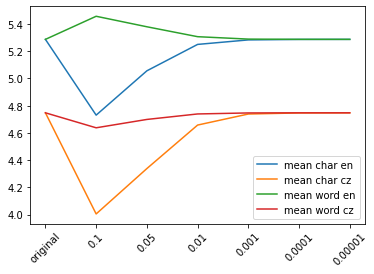

In [224]:
print(list(mean_char_en.array), list(mean_char_en.axes))
labels = ['original', '0.1', '0.05', '0.01', '0.001', '0.0001', '0.00001']
plt.plot(labels, list(mean_char_en.array), label="mean char en")
plt.plot(labels, list(mean_char_cz.array), label="mean char cz")
plt.plot(labels, list(mean_word_en.array), label="mean word en")
plt.plot(labels, list(mean_word_cz.array), label="mean word cz")
plt.xticks(rotation=45)
plt.legend()
plt.show()

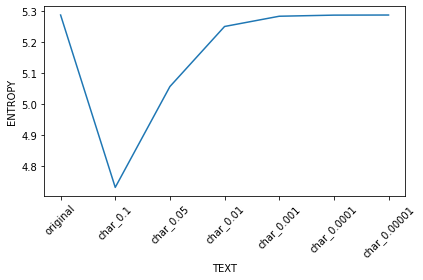

In [75]:
import matplotlib.pyplot as plt
char_en.groupby(['TEXT'],sort=False).agg('ENTROPY').mean().plot()
plt.xticks(rotation=45)
plt.ylabel("ENTROPY")
plt.tight_layout()
plt.savefig('report/figures/en_char_entropy')

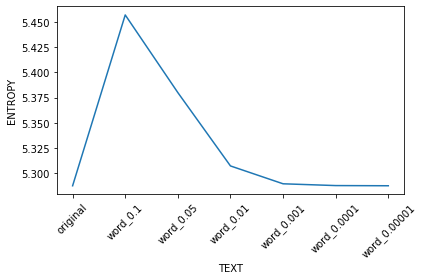

In [76]:
import matplotlib.pyplot as plt
word_en.groupby(['TEXT'],sort=False).agg('ENTROPY').mean().plot()
plt.xticks(rotation=45)
plt.ylabel("ENTROPY")
plt.tight_layout()
plt.savefig('report/figures/en_word_entropy')

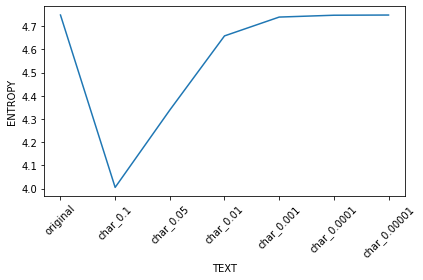

In [77]:
import matplotlib.pyplot as plt
char_cz.groupby(['TEXT'],sort=False).agg('ENTROPY').mean().plot()
plt.xticks(rotation=45)
plt.ylabel("ENTROPY")
plt.tight_layout()
plt.savefig('report/figures/cz_char_entropy')

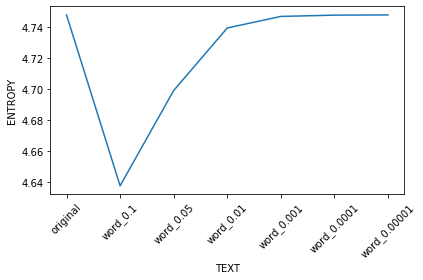

In [79]:
import matplotlib.pyplot as plt
figure, ax1= plt.subplots()
word_cz.groupby(['TEXT'],sort=False).agg('ENTROPY').mean().plot()
plt.xticks(rotation=45)
plt.ylabel("ENTROPY")
plt.tight_layout()
plt.savefig('report/figures/cz_word_entropy')

In [80]:
with open("TEXTEN1.txt", "r", encoding="iso-8859-2") as f:
    en_text = [word.strip() for word in f.readlines()]
with open("TEXTCZ1.txt", "r", encoding="iso-8859-2") as f:
    cz_text = [word.strip() for word in f.readlines()]

In [161]:
def compute_statistics(text):
    wc = len(set(text)) #total number of unique words
    cc = sum(map(len, text)) #total number of characters
    avg_cc = cc/len(text) #avg characters per word
    chars = len({char for word in text for char in word})
    
    from collections import Counter
    counts = Counter(text)
    num_common = sum(map(lambda x: x[1], counts.most_common(50))) #num times most common x words appear
    num_unique = len([word for word, value in counts.items() if value==1]) #num unique words
    
    bigram_counts = Counter()
    for i,j in zip(text, text[1:]):
        bigram_counts[i,j]+=1
    print("Text size:", len(text))
    print("Word count:", wc)
    print("Top 20 words frequency:", num_common)
    print("Number of unique words:", num_unique)
    
    print("Different bigrams",len(bigram_counts))
    print("Unique bigrams:", len([word for word, value in bigram_counts.items() if value==1])) #num unique words
    
    print("Character count:", cc)
    print("Average character count:", avg_cc)
    print("Number of unique characters:", chars)
    
# English statistics
compute_statistics(en_text)

Text size: 221098
Word count: 9607
Top 20 words frequency: 109798
Number of unique words: 3811
Different bigrams 73246
Unique bigrams: 49600
Character count: 972917
Average character count: 4.400388063211788
Number of unique characters: 74


In [162]:
# Czech statistics
compute_statistics(cz_text)

Text size: 222412
Word count: 42826
Top 20 words frequency: 78095
Number of unique words: 26315
Different bigrams 147136
Unique bigrams: 125007
Character count: 1030631
Average character count: 4.633882164631404
Number of unique characters: 117


In [234]:
import random
def mess_up_words(text, likelihood): 
    ''' 
    map a word to a random word from the text with the given likelihood, 
    otherwise keep the current word for all words in the text 
    ''' 
    word_set = set(text) 
    messed_up = list(map(lambda x: random.choice(list(word_set)) if  
        random.random() <= likelihood else x, text)) 
    return messed_up 

messed_up_en = mess_up_words(en_text, 0.1)

In [235]:
compute_statistics(messed_up_en)

Text size: 221098
Word count: 9569
Top 20 words frequency: 98803
Number of unique words: 464
Different bigrams 103214
Unique bigrams: 81882
Character count: 1040055
Average character count: 4.704045264995613
Number of unique characters: 74


In [236]:
messed_up_cz = mess_up_words(cz_text, 0.1)

In [237]:
compute_statistics(messed_up_cz)

Text size: 222412
Word count: 41282
Top 20 words frequency: 70163
Number of unique words: 15704
Different bigrams 164669
Unique bigrams: 146933
Character count: 1099688
Average character count: 4.944373505026707
Number of unique characters: 117


In [251]:
counts=Counter(messed_up_en)
len([word for word, value in counts.items() if value<=2]) #num unique words

1540

In [232]:
len(set(messed_up_en))

9561

In [257]:
def mess_up_chars(text, likelihood):
    # set of characters that appear in the text
    char_set = {char for word in text for char in word}
    messed_up = []
    for word in text:
        new_word = ''
        for char in word:
            if random.random() <= likelihood:
                new_char = random.choice(list(char_set))
            else:
                new_char = char
            new_word += new_char
        messed_up.append(new_word)
    return messed_up


messed_up_chars_en = mess_up_chars(en_text, 0.1)

In [258]:
compute_statistics(messed_up_chars_en)

Text size: 221098
Word count: 64403
Top 20 words frequency: 86016
Number of unique words: 55096
Different bigrams 157498
Unique bigrams: 145357
Character count: 972917
Average character count: 4.400388063211788
Number of unique characters: 74


# 2 Cross-Entropy and Language Modeling

In [ ]:
with open("lm_resultsEN.txt") as f:
    lm_results_en = pd.read_csv(f, sep='\t', skiprows=(0), header=(0))
    
with open("lm_resultsCZ.txt") as f:
    lm_results_cz = pd.read_csv(f, sep='\t', skiprows=(0), header=(0))

In [ ]:
import lm

In [ ]:
with open("TEXTEN1.txt", "r") as f:
    text = [word.strip() for word in f.readlines()]
model = lm.LM(text, "EN")

In [ ]:
items = list(model.p_3.items())

In [ ]:
([(keys, values) for keys, values in items if keys[1:]==('the','various')])

In [ ]:
smoothed_lm = model.get_smooth_probs(model.p, model.heldout)

In [ ]:
import numpy as np
from collections import defaultdict
def get_smooth_probs(model, p, heldout):
    l = np.random.rand(4)
    l = l/np.sum(l)
    p_smooth = defaultdict(int)
    # start at 2, since 0, 1 are start words
    for i in range(2, len(heldout)):
        p_smooth[heldout[i], heldout[i-2], heldout[i-1]] \
                = l[3]*p[3].get((heldout[i], heldout[i-2], heldout[i-1]),
                    0 if model.c_2[heldout[i-2], heldout[i-1]] > 0 else 1/model.vocab_size) \
                + l[2]*p[2].get((heldout[i], heldout[i-1]),
                    0 if model.c_1[heldout[i-1]] > 0 else 1/model.vocab_size) \
                + l[1]*p[1].get((heldout[i]), 0) \
                + l[0]*1/model.vocab_size

    return p_smooth
smoothed = get_smooth_probs(model, model.p, model.heldout)

In [ ]:
items = list(smoothed.items())

In [ ]:
sum([values for keys, values in items if keys[1:]==('the','various')])

In [272]:
with open("lm_resultsEN.txt") as f:
    lm_results_en = pd.read_csv(f, sep='\t', skiprows=(0), header=(0))
    
with open("lm_resultsCZ.txt") as f:
    lm_results_cz = pd.read_csv(f, sep='\t', skiprows=(0), header=(0))

In [273]:
for t, l, e in zip(lm_results_cz['TEXT'], lm_results_cz['LAMBDAS'], lm_results_cz['CROSS ENTROPY']):
    print(" & ".join(lm for lm in l.split(" ")) + " & " + str(round(e, 4)) +"\\")

[0.14027763 & 0.42893241 & 0.24462285 & 0.18616712] & 10.2198\
[0.12624986 & 0.38603917 & 0.22016056 & 0.2675504 & ] & 10.2243\
[0.1122221 &  & 0.34314593 & 0.19569828 & 0.34893369] & 10.2538\
[0.09819434 & 0.30025269 & 0.17123599 & 0.43031698] & 10.3059\
[0.08416658 & 0.25735945 & 0.14677371 & 0.51170027] & 10.3817\
[0.07013881 & 0.21446621 & 0.12231142 & 0.59308356] & 10.4852\
[0.05611105 & 0.17157296 & 0.09784914 & 0.67446685] & 10.625\
[0.04208329 & 0.12867972 & 0.07338685 & 0.75585013] & 10.818\
[0.02805553 & 0.08578648 & 0.04892457 & 0.83723342] & 11.1027\
[0.01402776 & 0.04289324 & 0.02446228 & 0.91861671] & 11.6002\
[0.00701388 & 0.02144662 & 0.01223114 & 0.95930836] & 12.0925\
[0.00140278 & 0.00428932 & 0.00244623 & 0.99186167] & 13.1646\
[0.14348653 & 0.43874439 & 0.25021868 & 0.1675504 & ] & 10.223\
[0.14669542 & 0.44855637 & 0.25581451 & 0.14893369] & 10.2281\
[0.14990432 & 0.45836835 & 0.26141035 & 0.13031698] & 10.2353\
[0.15311322 & 0.46818033 & 0.26700618 & 0.11170027] 

In [281]:
add_en = lm_results_en[0:12]
discount_en = pd.concat([lm_results_en[0:1],lm_results_en[12:]])

In [282]:
add_cz = lm_results_cz[0:12]
discount_cz = pd.concat([lm_results_cz[0:1],lm_results_cz[12:]])

In [285]:
mean_add_en = add_en.groupby(['TEXT'], sort=False).agg('CROSS ENTROPY').mean()
mean_add_cz = add_cz.groupby(['TEXT'], sort=False).agg('CROSS ENTROPY').mean()
mean_discount_en = discount_en.groupby(['TEXT'], sort=False).agg('CROSS ENTROPY').mean()
mean_discount_cz = discount_cz.groupby(['TEXT'], sort=False).agg('CROSS ENTROPY').mean()

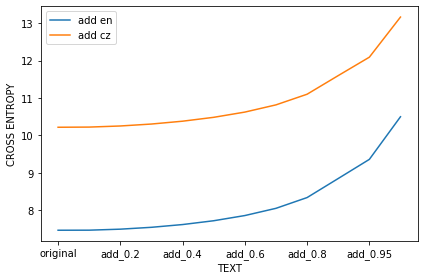

In [304]:
mean_add_en.plot(label="add en")
mean_add_cz.plot(label="add cz")
plt.legend()
plt.ylabel("CROSS ENTROPY")
plt.tight_layout()
plt.savefig("report/figures/add_lm")
plt.show()

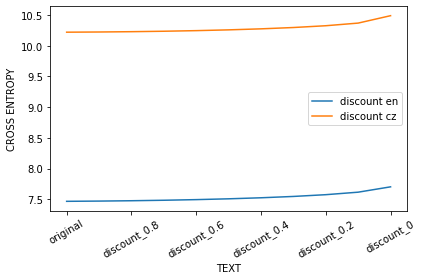

In [305]:
mean_discount_en.plot(label="discount en")
mean_discount_cz.plot(label="discount cz")
plt.legend()
plt.ylabel("CROSS ENTROPY")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("report/figures/discount_lm")
plt.show()

In [348]:
train = ['<s>','<s>'] + en_text[:-60000]
test = ['<s>','<s>'] + en_text[-60000:-20000]

train_set = set(train)
test_set = set(test)

sum(1 for word in test_set if word in train_set)/len(test_set)

0.7812904897641876

In [350]:
train = ['<s>','<s>'] + cz_text[:-60000]
test = ['<s>','<s>'] + cz_text[-60000:-20000]

train_set = set(train)
test_set = set(test)

sum(1 for word in test_set if word in train_set)/len(test_set)

0.5892093601803623

In [351]:
import lm

In [353]:
def compute_statistics(text, test):
    wc = len(set(text)) #total number of unique words
    cc = sum(map(len, text)) #total number of characters
    avg_cc = cc/len(text) #avg characters per word
    chars = len({char for word in text for char in word})
    
    from collections import Counter
    counts = Counter(text)
    num_common = sum(map(lambda x: x[1], counts.most_common(50))) #num times most common x words appear
    num_unique = len([word for word, value in counts.items() if value==1]) #num unique words
    
    train_bigram_counts = Counter()
    for i,j in zip(text, text[1:]):
        train_bigram_counts[i,j]+=1
    test_bigram_counts = Counter()
    for i,j in zip(test, test[1:]):
        test_bigram_counts[i,j]+=1
        
    train_trigram_counts = Counter()
    for i,j,k in zip(text, text[1:], text[2:]):
        train_trigram_counts[i,j,k]+=1
    test_trigram_counts = Counter()
    for i,j,k in zip(test, test[1:], test[2:]):
        test_trigram_counts[i,j,k]+=1
        
    test_set = set(test)
    train_set = set(train)
    print(sum(1 for word in test_set if word in train_set)/len(test_set))
    print(sum(1 for bi in test_bigram_counts.keys() if bi in train_bigram_counts.keys())/len(test_bigram_counts))
    print(sum(1 for tri in test_trigram_counts.keys() if tri in train_trigram_counts.keys())/len(test_trigram_counts))
        
    print("Text size:", len(text))
    print("Word count:", wc)
    print("Top 20 words frequency:", num_common)
    print("Number of unique words:", num_unique)
    
    print("Different bigrams",len(bigram_counts))
    print("Unique bigrams:", len([word for word, value in bigram_counts.items() if value==1])) #num unique words
    
    print("Different trigrams",len(train_trigram_counts))
    print("Unique trigrams:", len([word for word, value in train_trigram_counts.items() if value==1])) #num unique words
    
    print("Character count:", cc)
    print("Average character count:", avg_cc)
    print("Number of unique characters:", chars)
    
# English statistics
compute_statistics(train, test)

0.5892093601803623
0.2404775440591245
0.08890086206896551
dict_keys([('<s>', '<s>', 'na'), ('<s>', 'na', 'ministerstvu'), ('na', 'ministerstvu', 'levá'), ('ministerstvu', 'levá', 'ruka'), ('levá', 'ruka', 'neví'), ('ruka', 'neví', ','), ('neví', ',', 'co'), (',', 'co', 'dělá'), ('co', 'dělá', 'pravá'), ('dělá', 'pravá', ','), ('pravá', ',', 'podobně'), (',', 'podobně', 'jako'), ('podobně', 'jako', 'tomu'), ('jako', 'tomu', 'bylo'), ('tomu', 'bylo', 'v'), ('bylo', 'v', 'případě'), ('v', 'případě', 'pražského'), ('případě', 'pražského', 'magistrátu'), ('pražského', 'magistrátu', 'a'), ('magistrátu', 'a', 'Růžového'), ('a', 'Růžového', 'domečku'), ('Růžového', 'domečku', 'na'), ('domečku', 'na', 'Kampě'), ('na', 'Kampě', ','), ('Kampě', ',', 'jenž'), (',', 'jenž', 'byl'), ('jenž', 'byl', 'z'), ('byl', 'z', 'dražby'), ('z', 'dražby', 'stažen'), ('dražby', 'stažen', 'o'), ('stažen', 'o', 'týden'), ('o', 'týden', 'dříve'), ('týden', 'dříve', '.'), ('dříve', '.', 'Dr.'), ('.', 'Dr.', 'Herda')